In [54]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

In [55]:
import tensorflow as tf

In [56]:
print(tf.__version__)

2.8.0


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# install kaggle API
! pip install kaggle

In [59]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [60]:
# import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [61]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [62]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [63]:
# list of datasets
! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
yasserh/wine-quality-dataset                                     Wine Quality Dataset                                21KB  2022-01-15 19:15:11           7237  
mkoklu42/pistachio-dataset                                       Pistachio Dataset                                    2MB  2022-02-11 21:06:50             27  
prasertk/netflix-subscription-price-in-different-countries       Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           5575  
mkoklu42/durum-wheat-dataset                                     Durum Wheat Dataset                                983MB  2022-02-18 09:34:17              7  
majyhain/height-of-male-and-female-by-co

In [64]:
# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [65]:
# unzipping dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [66]:
dataset_1  = pd.read_csv('/content/creditcard.csv')

In [67]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
dataset_1.shape

(284807, 31)

In [69]:
# checking the null values
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [70]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [71]:
# observations in each class
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [72]:
# balence the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [73]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [74]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [75]:
non_fraud_t.shape

(492, 31)

In [76]:
# merge dataset
dataset = fraud.append(non_fraud_t, ignore_index=True)

In [77]:
print(dataset)

         Time        V1        V2        V3  ...       V27       V28  Amount  Class
0       406.0 -2.312227  1.951992 -1.609851  ...  0.261145 -0.143276    0.00      1
1       472.0 -3.043541 -3.157307  1.088463  ... -0.252773  0.035764  529.00      1
2      4462.0 -2.303350  1.759247 -0.359745  ...  0.039566 -0.153029  239.93      1
3      6986.0 -4.397974  1.358367 -2.592844  ... -0.827136  0.849573   59.00      1
4      7519.0  1.234235  3.019740 -4.304597  ... -0.010016  0.146793    1.00      1
..        ...       ...       ...       ...  ...       ...       ...     ...    ...
979   72625.0  1.220999  0.666645 -0.339468  ...  0.032831  0.039398    1.00      0
980  122150.0 -0.545310  2.213778  0.841039  ...  0.024217  0.239638   39.00      0
981  135653.0  1.623730 -0.346603 -0.985697  ...  0.040047  0.014694  160.00      0
982   57052.0  1.020888 -0.680486  1.017844  ... -0.034761  0.023234   84.64      0
983   39683.0 -1.213891  0.558350  2.036437  ... -0.070139  0.109915   26.00

In [78]:
# observations in each class
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [79]:
# matrix of features
x = dataset.drop(labels=['Class'], axis=1)

In [80]:
# dependent variable
y = dataset['Class']

In [81]:
x.shape, y.shape

((984, 30), (984,))

In [82]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [83]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [84]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [85]:
x_train

array([[ 0.80867573,  0.80604641, -0.61332394, ..., -0.09985013,
        -0.22485543, -0.4119348 ],
       [-0.79928598,  0.50498646, -0.08585813, ...,  0.46467145,
         0.58971708, -0.45079975],
       [-0.83574835,  0.18502111,  0.10930624, ...,  0.30247119,
         0.4364957 , -0.44978918],
       ...,
       [ 1.43533931,  0.840581  , -0.63740792, ..., -0.2602107 ,
        -0.31529865, -0.35340578],
       [ 1.40027459,  0.13726036, -0.07395923, ..., -0.21066219,
         0.10976167, -0.43715702],
       [ 0.96449378,  0.81310976, -0.78217854, ..., -0.20116865,
        -0.27341078, -0.13819585]])

In [86]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [87]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [88]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [89]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

In [90]:
# defining an object
model = tf.keras.models.Sequential()

In [91]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape = (30, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [92]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [93]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [94]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [95]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 30, 32)            96        
                                                                 
 batch_normalization_2 (Batc  (None, 30, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 15, 32)           0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_3 (Batc  (None, 15, 64)          

In [97]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [98]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 4s 23ms/step - loss: 0.9281 - accuracy: 0.5693 - val_loss: 0.6341 - val_accuracy: 0.7665
Epoch 2/25
25/25 [==============================] - 0s 10ms/step - loss: 0.6748 - accuracy: 0.6607 - val_loss: 0.5764 - val_accuracy: 0.7766
Epoch 3/25
25/25 [==============================] - 0s 13ms/step - loss: 0.5186 - accuracy: 0.7598 - val_loss: 0.5391 - val_accuracy: 0.7462
Epoch 4/25
25/25 [==============================] - 0s 13ms/step - loss: 0.4552 - accuracy: 0.8107 - val_loss: 0.5104 - val_accuracy: 0.7462
Epoch 5/25
25/25 [==============================] - 0s 11ms/step - loss: 0.4090 - accuracy: 0.8221 - val_loss: 0.4832 - val_accuracy: 0.7462
Epoch 6/25
25/25 [==============================] - 0s 13ms/step - loss: 0.3792 - accuracy: 0.8666 - val_loss: 0.4560 - val_accuracy: 0.7716
Epoch 7/25
25/25 [==============================] - 0s 18ms/step - loss: 0.3481 - accuracy: 0.8412 - val_loss: 0.4272 - val_accuracy: 0.7766
Epoch 8/25
25

In [100]:
# model predictions
y_pred = np.argmax(model.predict(x_test), axis=-1)


In [101]:
print(y_pred[12]), print(y_test[12])

0
1


(None, None)

In [102]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   0]
 [ 91   0]]


In [103]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.5380710659898477


In [104]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

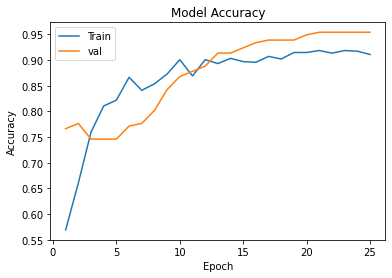

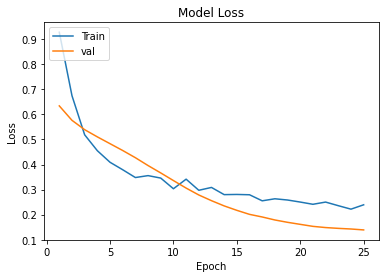

In [105]:
learning_curve(history, 25)